# Fake News Analysis

Link to Dataset: https://www.kaggle.com/code/maxcohen31/nlp-fake-news-detection-for-beginners/data

Data consists of:
* 23, 481 Fake News Articles
* 21,417 True News Articles

We will label the Fake News articles as 1 and True News articles as 0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load the Data

In [3]:
# Read in the dataset
directory = '/scratch/slevy1/CS88/'
fake_data = pd.read_csv(directory + 'Fake.csv')
true_data = pd.read_csv(directory + 'True.csv')


# Understand the shape of the data
print(f"Rows in Fake news dataset: {fake_data.shape[0]}")
print(f"Columns in Fake news dataset: {fake_data.shape[1]}\n")

print(f"Rows in True news dataset: {true_data.shape[0]}")
print(f"Columns in True news dataset: {true_data.shape[1]}")

Rows in Fake news dataset: 23481
Columns in Fake news dataset: 4

Rows in True news dataset: 21417
Columns in True news dataset: 4


In [4]:
# Label the Fake news as 1 and True news as 0
fake_data['isFake'] = 1
true_data['isFake'] = 0

fake_data['FakeName'] = 'Fake'
true_data['FakeName'] = 'Not Fake'

# Combine the datasets
data = pd.concat([fake_data, true_data])

In [5]:
# Sample of fake dataset
fake_data.head(5)

,title,text,subject,date,isFake,FakeName
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,Fake


In [6]:
# Sample of true dataset
true_data.head(5)

,title,text,subject,date,isFake,FakeName
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,Not Fake
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,Not Fake
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,Not Fake
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,Not Fake
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,Not Fake


### Clean the Data

In [7]:
# Add a column for year news article was published
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['Year'] = data['date'].dt.year

In [8]:
# Remove Stopwords from Titles and text
stopwords = [' stop ', ' the ', ' to ', ' an ', ' and ', ' so ', ' a ', ' in ', ' it ', ' is ', ' I ', ' that ', ' had ', ' on ', 
             ' for ', ' were ', ' was ', ' at ', ' of ', ' in ', ' are ', ' with ', ' by ', ' from ', ' this ', ' as ', ' not ', ' be ', ' will ']

# Remove the first 10 stopwords from Title
data['Clean Title'] = data['title'].str.lower()
for i in range(10):
    data['Clean Title'] = data['Clean Title'].str.replace("|".join(stopwords), "  ")

# Remove the firt 50 stopwords from Content (text)
data['Clean Content'] = data['text'].str.lower()
for i in range(10):
    data['Clean Content'] = data['Clean Content'].str.replace("|".join(stopwords), "  ")

In [9]:
data.head(10)

,title,text,subject,date,isFake,FakeName,Year,Clean Title,Clean Content
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,Fake,2017.0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,Fake,2017.0,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,Fake,2017.0,sheriff david clarke becomes internet joke ...,"on friday, revealed former milwaukee sherif..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,Fake,2017.0,trump obsessed he even has obama’s name cod...,"on christmas day, donald trump announced he w..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,Fake,2017.0,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,2017-12-25,1,Fake,2017.0,racist alabama cops brutalize black boy while...,the number cases cops brutalizing killing p...
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,2017-12-23,1,Fake,2017.0,"fresh off golf course, trump lashes out fbi...",donald trump spent good portion his day his...
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,2017-12-23,1,Fake,2017.0,trump said some insanely racist stuff inside ...,in wake yet another court decision derailed...
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,2017-12-22,1,Fake,2017.0,former cia director slams trump over un bully...,many people have raised alarm regarding fact...
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,2017-12-21,1,Fake,2017.0,watch: brand-new pro-trump ad features much ...,just when you might have thought we d get bre...


### Exploratory Data Analysis

#### Proportion of Fake vs. True Stories


[Text(0.5, 0, ' '),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Proportion of Fake News in Dataset')]

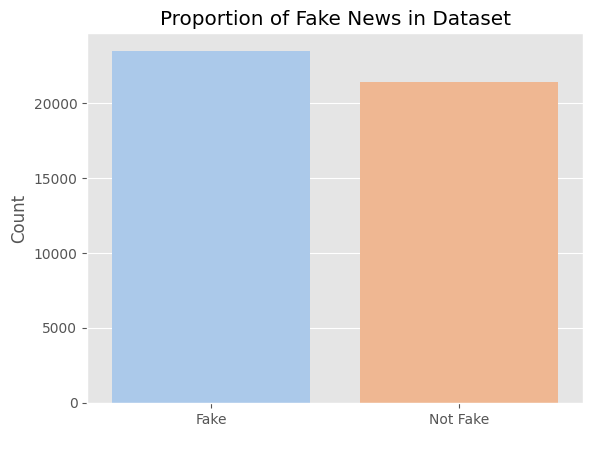

In [10]:
plt.style.use('ggplot')
sns.set_palette("pastel")
fig = sns.countplot(data = data, x = 'FakeName')
fig.set(xlabel=' ', ylabel='Count', title = "Proportion of Fake News in Dataset")

#### Fake News by Subject


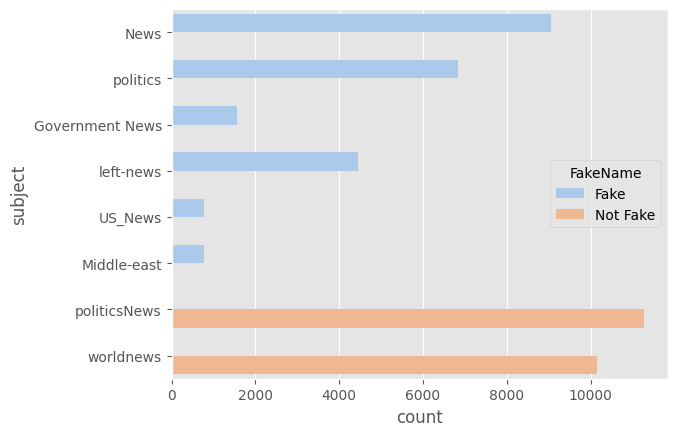

In [11]:
fig2 = sns.countplot(data = data, y = 'subject', hue = 'FakeName')

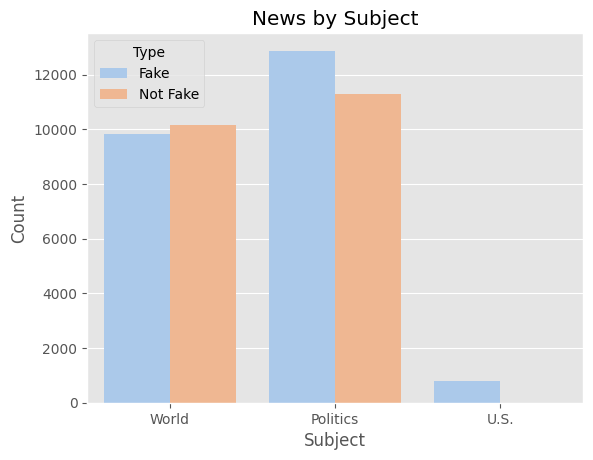

In [12]:
# Create new column for Subject
data['Subject'] = np.where(data['subject'] == 'politics', 'Politics',
                  np.where(data['subject'] == 'politicsNews', 'Politics',
                  np.where(data['subject'] == 'worldnews', 'World',
                  np.where(data['subject'] == 'News', 'World',
                  np.where(data['subject'] == 'Middle-east', 'World',
                  np.where(data['subject'] == 'Government News', 'Politics',
                  np.where(data['subject'] == 'left-news', 'Politics',
                  np.where(data['subject'] == 'US_News', 'U.S.','Other'))))))))

fig3 = sns.countplot(data = data, x = 'Subject', hue = 'FakeName')
fig3.set(xlabel='Subject', ylabel='Count', title = "News by Subject")
fig3.legend(title = 'Type')

#### Fake News by Year


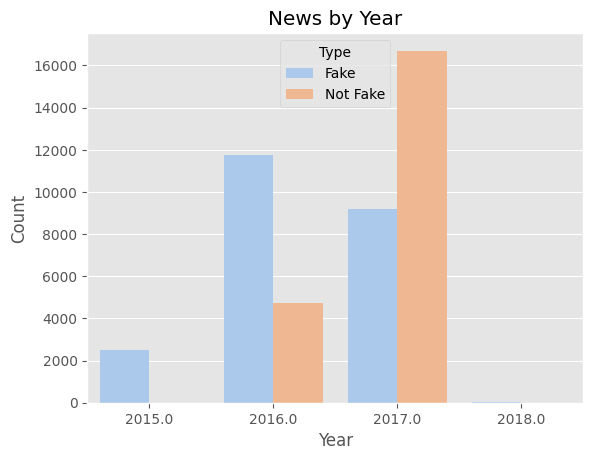

In [13]:
fig4 = sns.countplot(data = data, x = 'Year', hue = 'FakeName')
fig4.set(xlabel='Year', ylabel='Count', title = "News by Year")
fig4.legend(title = 'Type')

#### Fake News in Politics by Year

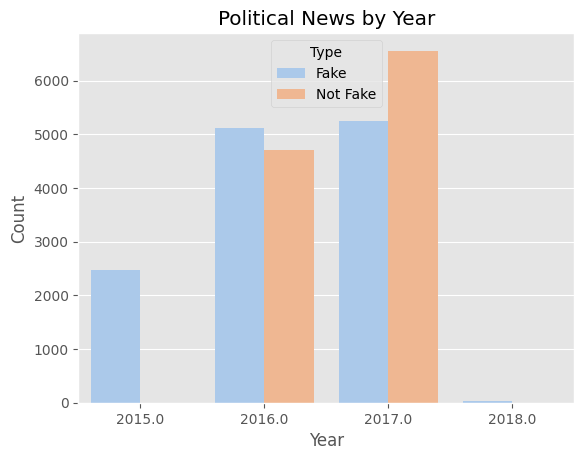

In [14]:
political_data = data[data['Subject'] == "Politics"]
fig5 = sns.countplot(data = political_data, x = 'Year', hue = 'FakeName')
fig5.set(xlabel='Year', ylabel='Count', title = "Political News by Year")
fig5.legend(title = 'Type')

### Logistic Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#### Logistic Regression using News Titles

In [16]:
# Split data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(data['Clean Title'], data['isFake'], test_size = 0.2,random_state=2)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)

In [17]:
# Create Logistic Model
model = LogisticRegression(C=2)
model.fit(X_vec_train, Y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(Y_test, predicted_value)
print("Accuracy of Logistic Model using News Title: ", accuracy_value)

Accuracy of Logistic Model using News Title:  0.9608192259597945


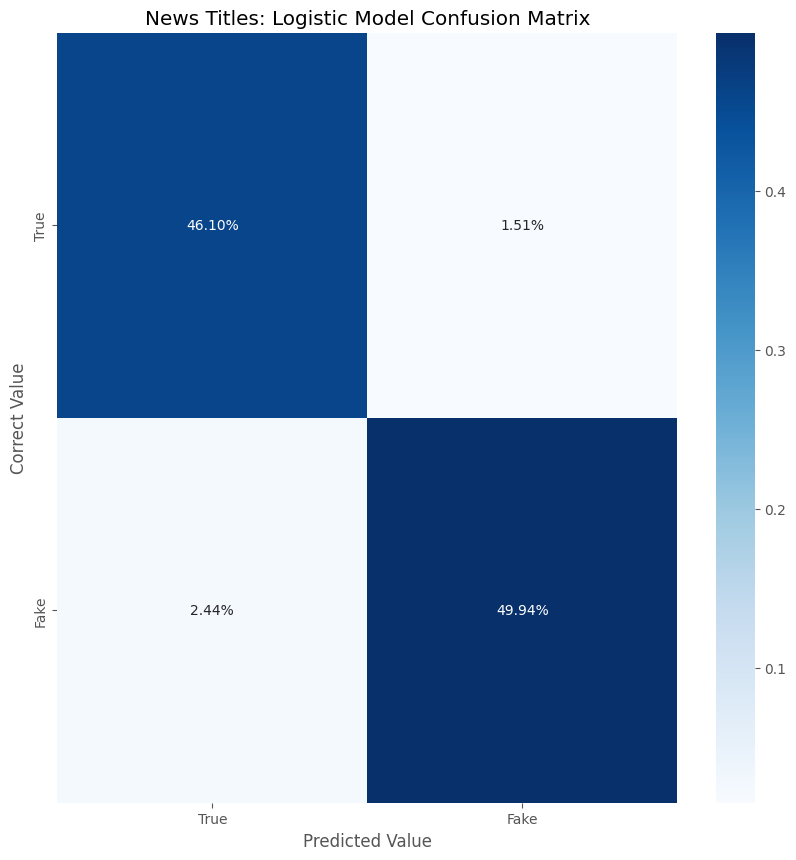

In [18]:
# Confusion Matrix for Logistic Model

conf_matrix = confusion_matrix(list(Y_test), predicted_value)

x_labs = ['True', 'Fake']
y_labs = ['True', 'Fake']

plt.figure(figsize = (10, 10))
fig6 = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot = True,fmt='.2%', cmap = 'Blues')
fig6.set(xlabel='Predicted Value', xticklabels = x_labs, yticklabels = y_labs, ylabel='Correct Value', title = "News Titles: Logistic Model Confusion Matrix")

conf_matrix = confusion_matrix(list(Y_test), predicted_value)

#### Logistic Regression using News Content

In [19]:
# Split data into training and testing set
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(data['Clean Content'], data['isFake'], test_size = 0.2,random_state=2)
vec_train2 = CountVectorizer().fit(X_train2)
X_vec_train2 = vec_train2.transform(X_train2)
X_vec_test2 = vec_train2.transform(X_test2)

In [20]:
# Create Logistic Model
model2 = LogisticRegression(C=2)
model2.fit(X_vec_train2, Y_train2)
predicted_value2 = model2.predict(X_vec_test2)
accuracy_value2 = roc_auc_score(Y_test2, predicted_value2)
print("Accuracy of Logistic Model using News Content: ", accuracy_value2)

Accuracy of Logistic Model using News Content:  0.9968961391853279


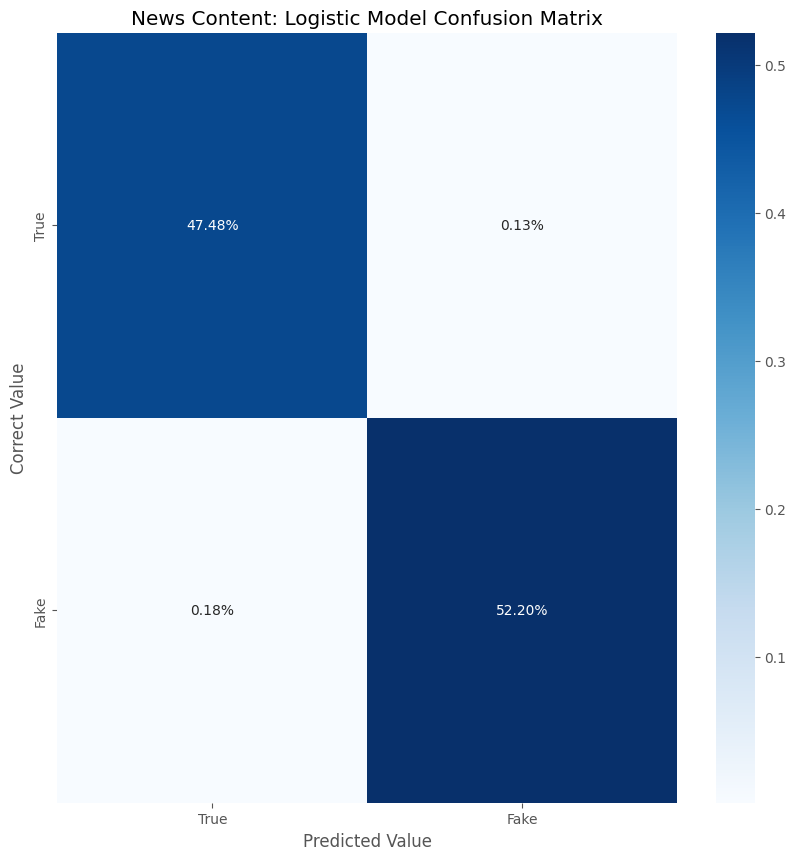

In [21]:
# Confusion Matrix for Logistic Model

conf_matrix2 = confusion_matrix(list(Y_test2), predicted_value2)

x_labs = ['True', 'Fake']
y_labs = ['True', 'Fake']

plt.figure(figsize = (10, 10))
fig7 = sns.heatmap(conf_matrix2/np.sum(conf_matrix2), annot = True,fmt='.2%', cmap = 'Blues')
fig7.set(xlabel='Predicted Value', xticklabels = x_labs, yticklabels = y_labs, ylabel='Correct Value', title = "News Content: Logistic Model Confusion Matrix")

conf_matrix2 = confusion_matrix(list(Y_test2), predicted_value2)

### Analysis between most Frequently used Words in Fake versus Real News

In [22]:
# Create a dataset to hold the top 15 most frequently used words in Titles of Fake News Datasets 
Fake_news = pd.DataFrame(pd.Series(' '.join(data[data['isFake']==1]['Clean Title']).split()).value_counts())
Fake_news.columns = ['Word Frequency']

Top_15_Fake = Fake_news.head(15)

In [26]:
# Create a dataset to hold the top 15 most frequently used words in Titles of True News Datasets 

True_news = pd.DataFrame(pd.Series(' '.join(data[data['isFake']==0]['Clean Title']).split()).value_counts())
True_news.columns = ['Word Frequency']
Top_15_True = True_news.head(15)

[Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Word'),
 Text(0.5, 1.0, 'Top 15 Words in Fake News Titles')]

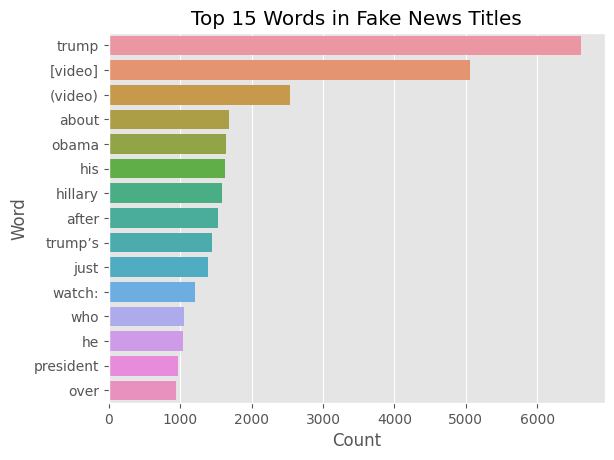

In [27]:
# Create Bargraph 
fig8 = sns.barplot(data = Top_15_Fake, x = 'Word Frequency', y = Top_15_Fake.index)
fig8.set(xlabel='Count', ylabel='Word', title = "Top 15 Words in Fake News Titles")

[Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Word'),
 Text(0.5, 1.0, 'Top 15 Words in True News Titles')]

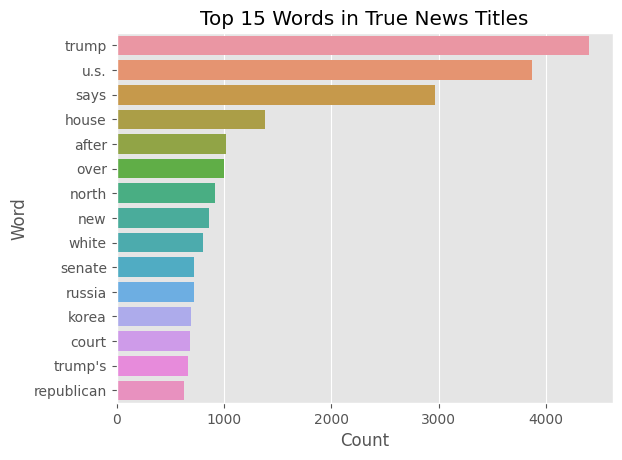

In [28]:
fig9 = sns.barplot(data = Top_15_True, x = 'Word Frequency', y = Top_15_True.index)
fig9.set(xlabel='Count', ylabel='Word', title = "Top 15 Words in True News Titles")